# Thermal coupling - Laminar flow

In [1]:
from trustutils import run

run.introduction("V. Blind, O. Cioni, U. Bieder.")

## Introduction 
 Validation made by : V. Blind, O. Cioni, U. Bieder.



 Report generated 25/01/2022

### Description
The case studies the thermal coupling between a fluid and a solid domains for a laminar flow.The mesh are created by TrioU. The thermal convection scheme EFStab is studied. The turbulent case is studied in another validation file.

* Dimension:  3D.
* Discretization:  VEFPrep1B.
* Thermal coupling.
* Convection scheme (hydraulic and thermal):  EFStab.

In [2]:
run.TRUST_parameters("1.5.7")

### TRUST parameters 
 * Version TRUST: 1.5.7
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Problemes_en_cours/ThermalCoupling_LaminarFlow_VEF/build)

In [2]:
from trustutils import run 
run.reset()
c1 = run.addCase("TrioU/alpha_1"    ,"laminar_coupled_pb.data",nbProcs=1)   
c2 = run.addCase("TrioU/alpha_02"   ,"laminar_coupled_pb.data",nbProcs=1)
run.printCases()
run.runCases() 

### Test cases 
* TrioU/alpha_1/laminar_coupled_pb.data : 
* TrioU/alpha_02/laminar_coupled_pb.data : 


Running **with Sserver**...
  => A total of 2 cases were (successfully) run in 670.3s.


## Presentation

### Description

The problem is defined as one fluid domain (thermohydraulic problem) and one solid domain (conductionproblem).  Both problems are thermally coupled.The fluid domain is a rectangular duct, for which the velocity profile is imposed.The  temperature  is  imposed  on  the  upper  boundary  of  the  fluid  domain.   Inside  the  solid  domain,  aconstant volume thermal powerqis imposed.  A symmetry is applied on the lower boundary of the solid.The problem is a 3D problem, but the solutions are two-dimensional.

### Geometry

The geometry is a 3D geometry.  The figure below is a schema of the geometry used for the problem.

<img src="build/schema_laminar.png">

### Geometry dimensions

The table below shows the geometrical dimensions for both domains.

In [3]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["Length(m)","Thickness(m)","Heigth(m)","Other(m)"])
data=plot.loadText("./TrioU/alpha_1/solide_dim.dat",dtype='str')
Tableau.addLigne([data],"Solid domain")
data=plot.loadText("./TrioU/alpha_1/fluide_dim.dat",dtype='str') 
Tableau.addLigne([data],"Fluid domain")
Tableau.df

,Length(m),Thickness(m),Heigth(m),Other(m)
Solid domain,0.5,0.2,0.5,h=0.5
Fluid domain,0.5,0.2,1.,H=1.5


### Fluid physical properties
Fluid incompressible, constant physical properties. \
The parameters are chosen in order to obtain a Prandtl number $Pr=\frac{\mu \cdot Cp}{\lambda}$ equal to 1.

In [4]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["Value"])
data=plot.loadText("./TrioU/alpha_1/rho_f.dat")
Tableau.addLigne([data],r"$\rho  (kg/m^3)$") 
data=plot.loadText("./TrioU/alpha_1/mu_f.dat")
Tableau.addLigne([data],r"$ \mu  (kg/m/s)$") 
data=plot.loadText("./TrioU/alpha_1/cp_f.dat")
Tableau.addLigne([data],r"$ Cp  (J/kg/K)$") 
data=plot.loadText("./TrioU/alpha_1/lambda_f.dat")
Tableau.addLigne([data],r"$ \lambda (W/m/K)$")  
Tableau.addLigne([1],r"$ \beta(1/K)$") 
data=plot.loadText("./TrioU/alpha_1/Prandtl.dat")
Tableau.addLigne([data],r"$Pr$") 
Tableau.df

,Value
$\rho (kg/m^3)$,10.0
$ \mu (kg/m/s)$,1.0
$ Cp (J/kg/K)$,5.0
$ \lambda (W/m/K)$,5.0
$ \beta(1/K)$,1.0
$Pr$,1.0


### Solid physical properties
Constant physical properties.

In [5]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["Value"])
data=plot.loadText("./TrioU/alpha_1/rho_s.dat")
Tableau.addLigne([data],"$$\rho  (kg/m^3)$$")  
data=plot.loadText("./TrioU/alpha_1/cp_s.dat")
Tableau.addLigne([data],"$$Cp  (J/kg/K)$$") 
data=plot.loadText("./TrioU/alpha_1/lambda_s.dat")
Tableau.addLigne([data],"$$\lambda (W/m/K)$$")  
Tableau.df

,Value
$$\rho (kg/m^3)$$,4.0
$$Cp (J/kg/K)$$,0.5
$$\lambda (W/m/K)$$,3.0


### Hydraulic boundary conditions
Periodicity between inlet and outlet boundaries.  The velocity profile is imposed as an initial condition.The Reynolds number
$Re=\frac{U \cdot Dh}{\nu} = \frac{U \cdot (H-h)}{2 \cdot \nu}$ is equal to 100. \
Upper boundary:  wall.Front and back boundaries:  symmetries. \
The joint boundary of both domains is a wall.

### Fluid thermal boundary conditions
Periodicity between inlet and outlet boundaries.\
Upper boundary:  imposed temperature $T_0= 0$.\
Front and back boundaries:  symmetries. \
The joint boundary of both domains is defined as a paroicontact.

### Solid thermal boundary condtions
Lower boundary:  symmetry.\
Lateral boundaries:  adiabatic walls.\
Volume thermal power:$q= 10W/m^3$.\
The joint boundary of both domains is defined as a paroi_contact.

### TrioU fluid mesh
The mesh is performed by a tetraedriser_homogene_fin. \
The figure below is a view of the fluid domain mesh.

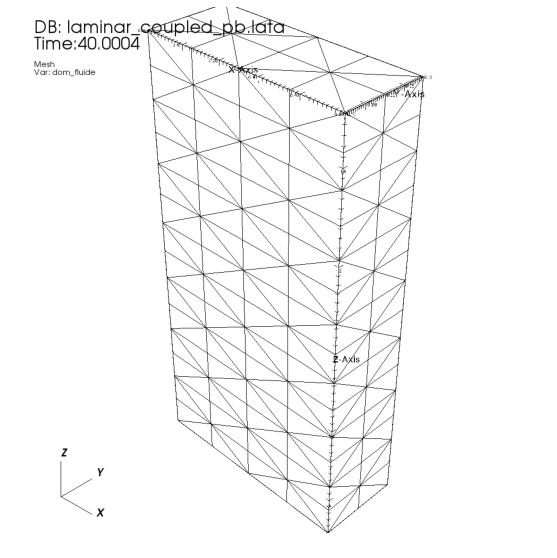

In [6]:
from trustutils import visit

a = visit.Show("./TrioU/alpha_1/laminar_coupled_pb.lata",'Mesh',"dom_fluide")
a.normal3D([0.5,-0.5,0.5])
a.up3D([0,0,1])
a.plot()

### TrioU solid mesh

The mesh is performed by a tetraedriser_homogene_fin.The figure below is a view of the solid domain mesh.

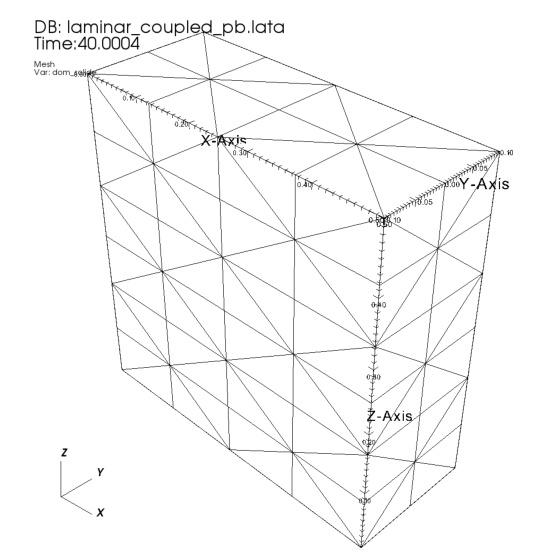

In [7]:
from trustutils import visit

a = visit.Show("./TrioU/alpha_1/laminar_coupled_pb.lata",'Mesh',"dom_solide")
a.normal3D([0.5,-0.5,0.5])
a.up3D([0,0,1])
a.plot()

### Time scheme
The conduction timestep inside the solid the limiting timestep.\
The time scheme is an implicit scheme, with a timestep smaller than the fluid timestep. Thus, only thesolid conduction equation is implicit.\
Time scheme:  Euler implicit. \
Solver:  implicit. \
Timestep limited by the fluid timestep.

### Numerical scheme

Thermal coupled problem.  Solid:  conduction problem.  Fluid:  thermohydraulic problem.\
Hydraulic convection scheme:  EFStab ($\alpha$= 1).\
Thermal convection scheme:  EFStab: $\alpha$= 1 and $\alpha$= 0.2.

## Analytical solutions
The problem can be fully solved for a stationnary state.

### Laminar velocity profile

For a laminar flow, the velocity profile is given by:

$$u(z)=U_{max}\cdot(1-\dfrac{z^2}{D_h^2}) \qquad \text{with} \qquad U_{max}=\dfrac{3.Q}{2.(H-h)} $$

where $Q$ is the flowrate.  The inlet boundary condition is defined as the laminar velocity profile.

### Temperature profiles

Inside the solid domain $(0<z<h)$, the thermal equation is

\begin{equation}
\dfrac{\partial^2T_s}{\partial z^2}=-\dfrac{q}{\lambda_s} \qquad \text{which gives} \qquad T_s(z)=-\dfrac{q}{2\cdot\lambda_s}\cdot z^2+A\cdot z+B
\end{equation}

where $q$ is the volume thermal power and $\lambda_s$ the solid conductivity.

Inside the fluid domain ($h$<$z$<$H$), the thermal equation is:

$\dfrac{\partial^2T_f}{\partial z^2}=0 \qquad \text{which gives} \qquad T_f(z)=C\cdot z+D$.

The boundary conditions are:

$z=0$, symmetry condition, $ \left. \dfrac{d T_s}{dz} \right|_0 =0$, 

$z=h$, temperature equality, $T_s(h)=T_f(h)$, 

$z=h$, heat flux equality, $\lambda_s\cdot \left. \dfrac{d T_s}{dz} \right|_h=\lambda_f\cdot\left. \dfrac{d T_f}{dz} \right|_h $,

$z=H$, imposed temperature, $T_f(H)=T_0$.

Finally, the thermal analytical solutions are:

$T_s(z)=\dfrac{q}{2\cdot\lambda_s}\cdot(h^2-z^2)+\dfrac{q\cdot h}{\lambda_f}\cdot(H-h)+T_0 \qquad \text{and} \qquad T_f(z)=\dfrac{q\cdot h}{\lambda_f}\cdot(H-z)+T_0 $\cdot"

The thermal flux $\varphi$ at the joint boundary and at the upper boundary of the fluid is equal to: $\varphi=q\cdot h$.

The contact temperature $T_{c}$ is given by $T_{c}=T_s(h)=T_f(h)=\dfrac{q\cdot h}{\lambda_f}\cdot(H-h)+T_0$.

Moreover, the maximal temperature inside the solid $T_{max}$ is located at $z=0$ and its value is:

$T_{max}=T_s(0)=q\cdot h\cdot(\dfrac{h}{2\cdot\lambda_s}+\dfrac{H-h}{\lambda_f})+T_0$.

## Numerical results
Two values $\alpha$ of the thermal convection scheme are tested.

### Velocity profile inside the fluid domain
The velocity profile is a Poiseuille profile.

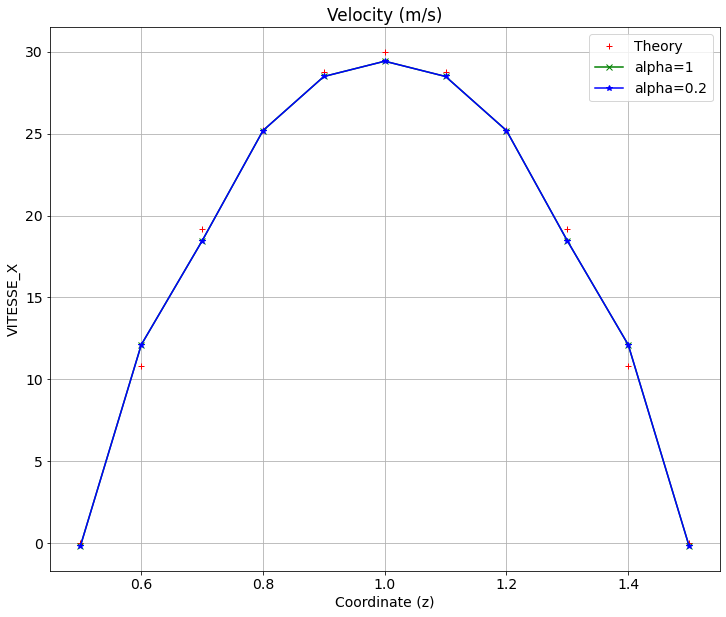

In [8]:
from trustutils.jupyter import plot
import matplotlib.pyplot as plt 
import numpy as np


Graphique=plot.Graph("Velocity (m/s)")

data=plot.loadText("./TrioU/alpha_1/profil_velocity.dat")

Graphique.add(data[0],data[1],"r+",label="Theory")
Graphique.addSegment("./TrioU/alpha_1/laminar_coupled_pb_SEG_VITESSE_FLUIDE.son",marker="-x",color="g",label="alpha=1")
Graphique.addSegment("./TrioU/alpha_1/laminar_coupled_pb_SEG_VITESSE_FLUIDE.son",marker="-*",color="b",label="alpha=0.2")

### Temporal evolution of the maximal temperature
The figure below shows the temporal evolution of the maximal temperature for both calculations.When the temperatures are constants, the stationnary state is reached.


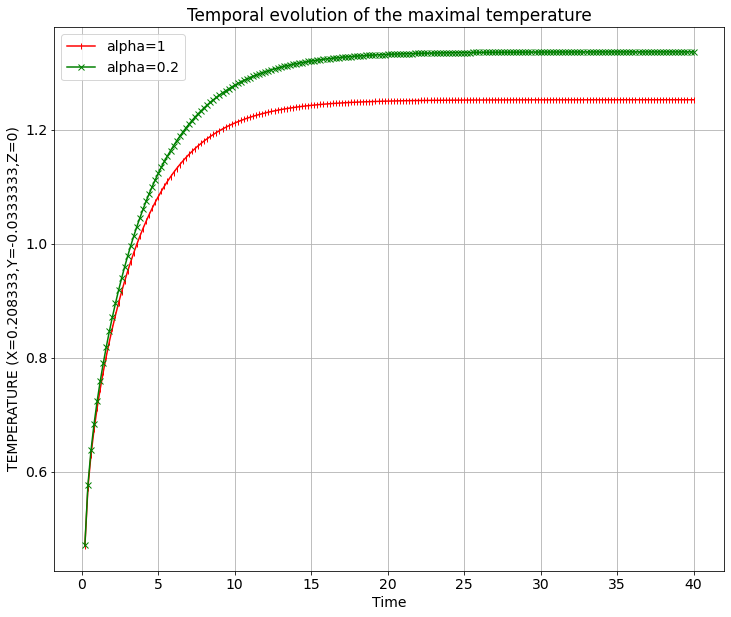

In [9]:
from trustutils.jupyter import plot 

Graphique=plot.Graph("Temporal evolution of the maximal temperature") 
Graphique.addPoint("./TrioU/alpha_1/laminar_coupled_pb_TEMP_MAX.son", marker="-|",color="r",label="alpha=1")
Graphique.addPoint("./TrioU/alpha_02/laminar_coupled_pb_TEMP_MAX.son",marker="-x",color="g",label="alpha=0.2")

### Thermal flux comparison
The theory shows that the thermal flux at the joint boundary and at the upper boundary of the fluid areequal.\
For the calculations, the diffusionchaleur.out file gives the thermal flux for the boundaries.\
The table below compares the theoretical and the calculated flux, which shows that the thermal flux areequal.

In [10]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["Theory" , "Joint boundary" , "Upper boundary" ])
data=plot.loadText("./TrioU/alpha_1/flux.dat")
Tableau.addLigne([data],r"$\alpha=1$")  
data=plot.loadText("./TrioU/alpha_02/flux.dat")
Tableau.addLigne([data],r"$\alpha=0.2$")  
Tableau.df

,Theory,Joint boundary,Upper boundary
$\alpha=1$,5.0,5.00000,-4.99993
$\alpha=0.2$,5.0,4.99999,-4.99980


### Temperature profile inside the fluid domain

For the computations, the temperature profile are calculated with a probe (segment).

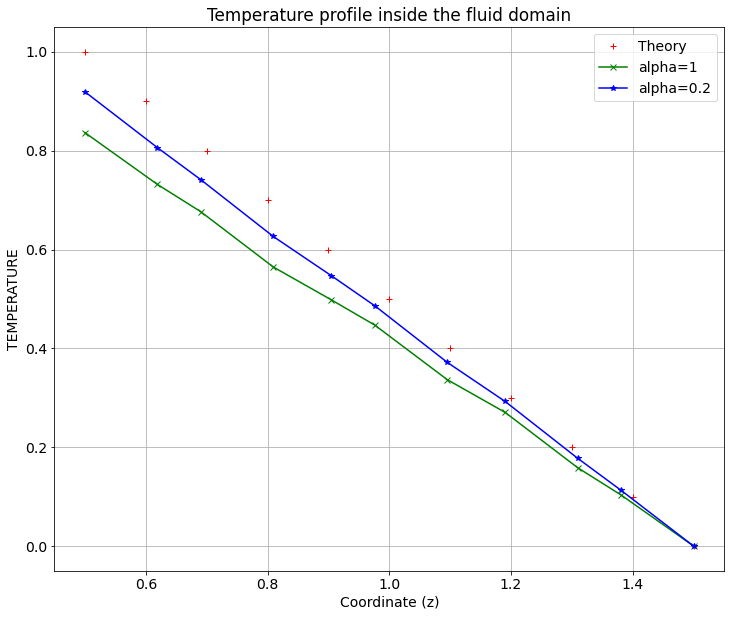

In [11]:
from trustutils.jupyter import plot
import matplotlib.pyplot as plt 
import numpy as np


Graphique=plot.Graph("Temperature profile inside the fluid domain")
data=plot.loadText("./TrioU/alpha_1/profil_temp_fluide.dat")
Graphique.add(data[0],data[1],"r+",label="Theory")
Graphique.addSegment("./TrioU/alpha_1/laminar_coupled_pb_SEG_TEMP_FLUIDE.son",marker="-x",color="g",label="alpha=1")
Graphique.addSegment("./TrioU/alpha_02/laminar_coupled_pb_SEG_TEMP_FLUIDE.son",marker="-*",color="b",label="alpha=0.2")

### Temperature profile inside the solid domain
For the computations, the solid temperature profiles are calculated with a probe (segment).

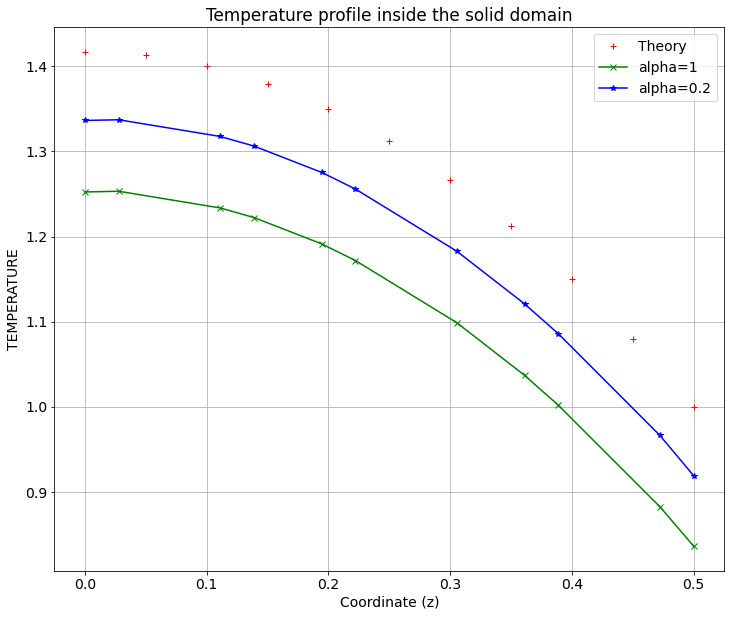

In [12]:
from trustutils.jupyter import plot
import matplotlib.pyplot as plt 
import numpy as np


Graphique=plot.Graph("Temperature profile inside the solid domain")
data=plot.loadText("./TrioU/alpha_1/profil_temp_solide.dat")
Graphique.add(data[0],data[1],"r+",label="Theory")
Graphique.addSegment("./TrioU/alpha_1/laminar_coupled_pb_SEG_TEMP_SOLIDE.son",marker="-x",color="g",label="alpha=1")
Graphique.addSegment("./TrioU/alpha_02/laminar_coupled_pb_SEG_TEMP_SOLIDE.son",marker="-*",color="b",label="alpha=0.2")

### Temperature difference inside the solid

Inside the solid domain, the theory gives: $ T_{max}-T_c=\dfrac{q\cdot h^2}{2\cdot \lambda_s} $. \
The maximal and contact temperatures are given by probes.\
The table below compares the differences for both calculations. The results show that the temperature differences are correctly solved.

In [13]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["Theory" , "Joint boundary" , "Upper boundary" ])
data=plot.loadText("./TrioU/alpha_1/delta.dat")
Tableau.addLigne([data],r"$\alpha=1$")  
data=plot.loadText("./TrioU/alpha_02/delta.dat")
Tableau.addLigne([data],r"$\alpha=0.2$")   
Tableau.df

,Theory,Joint boundary,Upper boundary
$\alpha=1$,0.416667,0.415605,-0.25488
$\alpha=0.2$,0.416667,0.416871,0.04896


### Contact temperature comparison

The contact temperature between fluid and solid domains can be analytically calculated. \
For the calculations, the contact temperatures are calculated with probes.\
The table below shows the contact temperatures between calculations and theory.

In [14]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["","Theory" , "Joint boundary" , "Upper boundary" ])
data=plot.loadText("./TrioU/alpha_1/Tcs.dat",dtype='str')
Tableau.addLigne([data],r"$\alpha=1$")  
data=plot.loadText("./TrioU/alpha_02/Tcs.dat",dtype='str')
Tableau.addLigne([data],r"$\alpha=0.2$")   
Tableau.df

,,Theory,Joint boundary,Upper boundary
$\alpha=1$,Tc,1.0000,0.8367,-16.3263
$\alpha=0.2$,Tc,1.0000,0.9194,-8.0614


### Maximal temperature comparison
The maximal temperature in the solid is given by the theory.\
For the calculations, the maximal temperatures are calculated with probes.\
The error calculated on the maximal temperature is linked to the error calculated on the contact temperature.  The difference is smaller because the value of the maximal temperature is greater than thecontact temperature.\
The results between calculations and theory are gathered in the table below.

In [15]:
from trustutils.jupyter import plot
import numpy as np

Tableau=plot.Table(["","Theory" , "Joint boundary" , "Upper boundary" ])
data=plot.loadText("./TrioU/alpha_1/Tmax.dat",dtype='str')
Tableau.addLigne([data],r"$\alpha=1$")  
data=plot.loadText("./TrioU/alpha_02/Tmax.dat",dtype='str')
Tableau.addLigne([data],r"$\alpha=0.2$")   
Tableau.df

,,Theory,Joint boundary,Upper boundary
$\alpha=1$,Tmax,1.4167,1.2523,-11.5994
$\alpha=0.2$,Tmax,1.4167,1.3363,-5.6759


## Conclusions

With the standard version used, the results are not in good accordance with the analytical results.
$\alpha = 0.2$ for the thermal convection scheme gives better results than $\alpha = 1$.

## Performances

In [16]:
from trustutils import run
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
TrioU/alpha_1/laminar_coupled_pb,is244522,Linux,667.465,0.00833377,672-288
TrioU/alpha_02/laminar_coupled_pb,is244522,Linux,670.076,0.00836637,672-288
Total,,,1337.541,,


## Data Files

## laminar_coupled_pb

In [17]:
from trustutils import run
run.dumpDataset("./laminar_coupled_pb.data")

 Dimension 3
 Domaine dom_fluide
 Domaine dom_solide
 
 Pb_thermohydraulique pb1
 Pb_conduction pb2
 
 # BEGIN MESH #
 
 Mailler dom_solide {
 	 Pave Cavite2 {
 	 	 Origine 0. -0.1 0.
      	 	 Nombre_de_Noeuds 3 2 4
 	 	 longueurs 0.5 0.2 0.5
 	 	 facteurs 1. 1. 1.
 	 } {
 	 	 bord Bas2 Z = 0. 0. <= X <= 0.5 -0.1 <= Y <= 0.1
 	 	 Raccord local homogene Contact Z = 0.5 0. <= X <= 0.5 -0.1 <= Y <= 0.1
 	 	 	 	 
 	 	 Bord Gauche2 X = 0. -0.1 <= Y <= 0.1 0. <= Z <= 0.5
 	 	 Bord Droite2 X = 0.5 -0.1 <= Y <= 0.1 0. <= Z <= 0.5
 	 	 
 	 	 Bord Devant2 Y = -0.1 0. <= X <= 0.5 0. <= Z <= 0.5
 	 	 Bord Derriere2 Y = 0.1 0. <= X <= 0.5 0. <= Z <= 0.5
 	 } 
 	 }
 Mailler dom_fluide {
 	 Pave Cavite1 {
 	 	 Origine 0. -0.1 0.5
      	 	 Nombre_de_Noeuds 3 2 8
 	 	 LONGUEURS 0.5 0.2 1.
 	 	 facteurs 1. 1. 1.
 	 } {
 	 	 Raccord local homogene Contact Z = 0.5 0. <= X <= 0.5 -0.1 <= Y <= 0.1
 	 	 bord Haut1 Z = 1.5 0. <= X <= 0.5 -0.1 <= Y <= 0.1
 	 	 	 	 
 	 	 Bord PerioX X = 0. -0.1 <= Y <= 0.1 0.